In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [66]:
def GetData():
    advertiser_name_list = ["频度-卫仕小号"]
    df = pd.DataFrame(columns = ['id', 'advertiser_id', 'ad_id', 'time', 'stat_cost','show_cnt', 'ctr', 'cpm_platform', 'click_cnt', 'pay_order_count', 'create_order_amount', 'prepay_and_pay_order_roi', 'prepay_order_count', 'prepay_order_amount', 'create_order_count', 'pay_order_amount', 'create_order_roi', 'dy_follow', 'convert_cnt', 'convert_cost', 'convert_rate', 'dy_share', 'dy_comment', 'dy_like', 'live_pay_order_cost_per_order', 'luban_live_enter_cnt', 'live_watch_one_minute_count', 'live_fans_club_join_cnt', 'luban_live_slidecart_click_cnt', 'luban_live_click_product_cnt', 'luban_live_comment_cnt', 'luban_live_share_cnt', 'luban_live_gift_cnt', 'luban_live_gift_amount', 'create_time', 'update_time', 'class_id'])
    for advertiser_name in advertiser_name_list:
        fileLoc = "Data/task_data/convert_" + advertiser_name + ".csv"
        # 取前1000行数据
#         temp = pd.read_csv(fileLoc, skiprows=0, nrows=4000)
        # 取所有数据
        temp = pd.read_csv(fileLoc, skiprows=0)
#         print(temp)
        df = pd.concat([df, temp], ignore_index=True)
    
    data = df.drop(columns=['prepay_order_count', 'prepay_order_amount', 'id', 'advertiser_id', 'ad_id', 'dy_share', 'dy_comment', 'dy_like', 'time', 'create_time', 'update_time', 'class_id'])
    
    # 根据roi对一个团队的计划效果取好和坏的数据
    data.sort_values(by="prepay_and_pay_order_roi", inplace=True, ascending=False)
#     print(data)
    data_good = data[data['prepay_and_pay_order_roi'] >= 0.85]
    data_good['roi_class'] = 1
    data_bad = data[data['prepay_and_pay_order_roi'] < 0.85]
    data_bad['roi_class'] = 0
    print(data_good, data_bad)
    
    data_good = data_good.sample(n=2000, random_state=1227)
    data_bad = data_bad.sample(n=2000, random_state=1228)
#     print(data_good, data_bad)
    data_sample = pd.concat([data_good, data_bad], ignore_index=True)
#     print(data_sample)
    
    # 检查是否有缺失值
#     print(data.isnull().any())
    label = data_sample.loc[:, 'roi_class']
    label_array = np.array(label)
    label_list = label_array.tolist()
    data_sample = data_sample.drop(columns=['roi_class', 'prepay_and_pay_order_roi'])
    data_array = np.array(data_sample)
    data_list = data_array.tolist()
# #     print(data_list)
# #     print(label_list)
    n_samples, n_features = data_sample.shape
# #     print(n_samples, n_features)
#     print(data_sample)
#     print(label)
# #     print(df)
    return data_list, label_list, n_samples, n_features

In [67]:
GetData()

<ipython-input-66-f67428fba87f>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_good['roi_class'] = 1
<ipython-input-66-f67428fba87f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bad['roi_class'] = 0


        stat_cost show_cnt    ctr  cpm_platform click_cnt pay_order_count  \
72256        0.00        0   6.67        101.33         0               0   
72321        0.58        0   6.67        101.33         0               0   
87601        0.69        0  16.67         94.44         0               0   
69837        0.00        0   3.33         93.33         0               0   
69753        0.00        1   3.45         96.55         0               0   
...           ...      ...    ...           ...       ...             ...   
8383         0.09        2   2.70        197.12         0               0   
5124        15.29       36   3.21        215.66         0               0   
111201       8.89       95   1.83         92.94         0               0   
125672       0.00        0   3.42        432.17         0               0   
125732       3.16        1   3.42        432.17         0               0   

        create_order_amount  prepay_and_pay_order_roi create_order_count  \

([[0.5099999999999909,
   2,
   1.84,
   94.65,
   0,
   0,
   0.0,
   0,
   0.0,
   3.04,
   0,
   0,
   1,
   3.0,
   486.0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0.0],
  [0.9300000000000068,
   9,
   2.41,
   167.31,
   0,
   0,
   0.0,
   0,
   0.0,
   1.38,
   0,
   0,
   1,
   3.0,
   0.0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0.0],
  [1.3000000000000114,
   7,
   1.37,
   160.03,
   0,
   0,
   0.0,
   0,
   0.0,
   0.93,
   0,
   0,
   1,
   5.0,
   217.0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0.0],
  [1.0600000000000025,
   4,
   3.61,
   254.56,
   0,
   0,
   0.0,
   0,
   0.0,
   3.0,
   0,
   0,
   0,
   5.0,
   306.75,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0.0],
  [0.0,
   1,
   0.85,
   238.64,
   0,
   0,
   0.0,
   0,
   0.0,
   9.2,
   0,
   0,
   0,
   100.0,
   0.0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0.0],
  [0.0,
   1,
   3.45,
   96.55,
   0,
   0,
   0.0,
   0,
   0.0,
   135.0,
   0,
   0,
   0,

In [68]:
def PlotEmbedding(data, label, n_samples):
    x_min, x_max = np.min(data, 0), np.max(data, 0)
    data = (data - x_min) / (x_max - x_min)
    fig = plt.figure(figsize=(15, 10))
    ax = plt.subplot(111)
    
    type1_x = list()
    type1_y = list()
    type2_x = list()
    type2_y = list()
    
    for i in range(len(label)):
        if label[i] == 0:
            type1_x.append(data[i, 0])
            type1_y.append(data[i, 1])
        if label[i] == 1:
            type2_x.append(data[i, 0])
            type2_y.append(data[i, 1])
    
    type1 = ax.scatter(type1_x, type1_y, c='#0000FF', marker='o', s=10)
    type2 = ax.scatter(type2_x, type2_y, c='#00FF00', marker='o', s=10)
    
    ax.legend((type1, type2), ('roi<0.85', 'roi>=0.85'), loc="upper right")
    
#     scatter = ax.scatter(data[:, 0], data[:, 1], c=colors, marker='o', s=10)
#     # 按照散点图中标记的colors生成legend
#     legendClass = ax.legend(*scatter.legend_elements(), loc="upper right", title="classes", ncol=4)
#     ax.add_artist(legendClass)
    
#     for i in range(n_samples):
#         plt.text(data[i, 0], data[i, 1], str(label[i]), color=plt.cm.Set1(label[i] / 10), fontdict={'weight': 'bold', 'size': 7})
    
    plt.xticks()
    plt.yticks()
    plt.title("t-SNE Embedding", fontsize=14)
    return fig

In [69]:
# 训练函数
def Train():
    data, label, n_samples, n_features = GetData()
    tsne = TSNE(n_components=2, init='pca', random_state=0)
    result = tsne.fit_transform(data)
    return result, label, n_samples, n_features

In [70]:
result, label, n_samples, n_features = Train()

<ipython-input-66-f67428fba87f>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_good['roi_class'] = 1
<ipython-input-66-f67428fba87f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bad['roi_class'] = 0


        stat_cost show_cnt    ctr  cpm_platform click_cnt pay_order_count  \
72256        0.00        0   6.67        101.33         0               0   
72321        0.58        0   6.67        101.33         0               0   
87601        0.69        0  16.67         94.44         0               0   
69837        0.00        0   3.33         93.33         0               0   
69753        0.00        1   3.45         96.55         0               0   
...           ...      ...    ...           ...       ...             ...   
8383         0.09        2   2.70        197.12         0               0   
5124        15.29       36   3.21        215.66         0               0   
111201       8.89       95   1.83         92.94         0               0   
125672       0.00        0   3.42        432.17         0               0   
125732       3.16        1   3.42        432.17         0               0   

        create_order_amount  prepay_and_pay_order_roi create_order_count  \

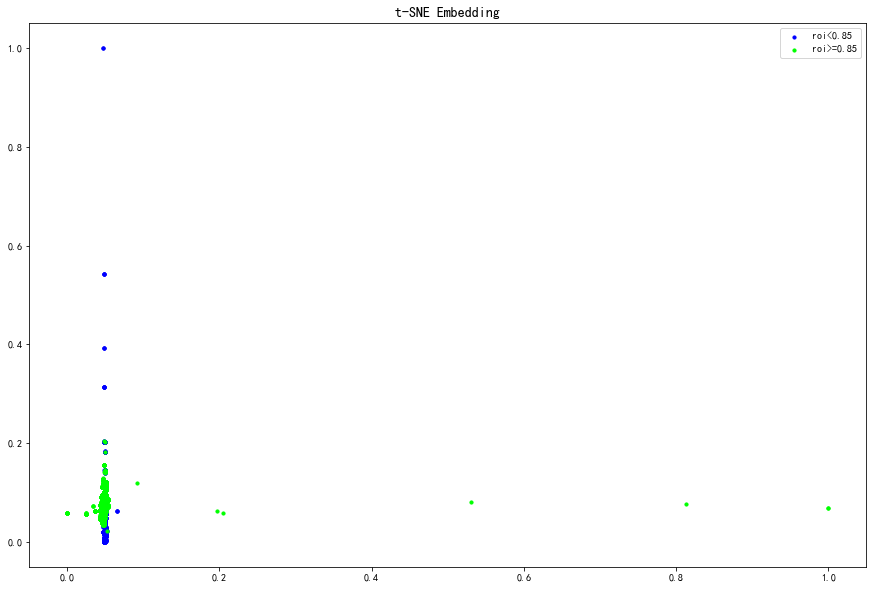

In [71]:
fig = PlotEmbedding(result, label, n_samples)
plt.show()